In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import math

In [2]:
# Pasamos la columna 'date' a formato datetime

def ajustar_fecha(df):
    try:
        print('ok')
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')
    except ValueError:  # Capturamos la excepción correcta
        for i in range(len(df)):
            fecha = df.loc[i, 'date']  

            if len(fecha) == 10:  # Verificamos si la fecha no tiene hora
                fecha += ' 00:00:00'  # Añadimos '00:00:00'
            
                # Convertimos la cadena a formato datetime
                df.loc[i, 'date'] = pd.to_datetime(fecha)
                
    return df
    

In [25]:

#TODO Introducir el dataset con el que se vaya a trabajar
station = 'escudero'


df = pd.read_csv(f'./data/{station}_clean.csv')

cols = [col for col in df.columns]

df_copy = df[cols]
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130531 entries, 0 to 130530
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     130531 non-null  object 
 1   dew      124026 non-null  float64
 2   hr       124007 non-null  float64
 3   prec     62085 non-null   float64
 4   trace    62085 non-null   float64
 5   pres     122306 non-null  float64
 6   station  124224 non-null  float64
 7   ts       124214 non-null  float64
 8   dir      123627 non-null  float64
 9   speed    124148 non-null  float64
 10  value    0 non-null       float64
dtypes: float64(10), object(1)
memory usage: 11.0+ MB


In [6]:
df_copy = ajustar_fecha(df_copy)
df_copy['date'] = pd.to_datetime(df_copy['date'], errors='coerce')
df_copy = df_copy.sort_values('date')
df_copy = df_copy.drop_duplicates(subset=['date'], keep='first')
df_copy.info()

ok
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221508 entries, 0 to 221507
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      221508 non-null  datetime64[ns]
 1   dew       221034 non-null  float64       
 2   hr        219193 non-null  float64       
 3   prec      62085 non-null   float64       
 4   trace     62085 non-null   float64       
 5   pres      186430 non-null  float64       
 6   station   221502 non-null  float64       
 7   ts        221377 non-null  float64       
 8   dir       220073 non-null  float64       
 9   speed     221298 non-null  float64       
 10  VRB_wind  221299 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 18.6 MB


In [5]:
full_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='H')
df_full = pd.DataFrame(full_range, columns=['date'])
df = pd.merge(df_full, df, on='date', how='left')


/tmp/ipykernel_44238/973536933.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='H')


ValueError: You are trying to merge on datetime64[ns] and object columns for key 'date'. If you wish to proceed you should use pd.concat

### Rellenamos todas las fechas faltantes

In [13]:
full_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='3H')

# Identificar las fechas faltantes
missing_dates = full_range.difference(df['date'])

# Crear un DataFrame con las fechas faltantes y valores NaN
missing_rows = pd.DataFrame({'date': missing_dates, 'value': [None] * len(missing_dates)})

# Combinar el DataFrame original con las filas faltantes
df_complete = pd.concat([df, missing_rows]).sort_values('date').reset_index(drop=True)

# Contar cuántas filas nuevas se crearon
new_rows_count = len(missing_rows)

# Imprimir el número de filas nuevas
print(f"Se han creado {new_rows_count} filas nuevas con NaN.")

# Mostrar el DataFrame resultante
print(df_complete)

Se han creado 6307 filas nuevas con NaN.
                      date  dew    hr  prec  trace   pres   station   ts  \
0      1980-01-01 00:00:00  1.6  97.0   0.0    1.0  998.5  950001.0  2.1   
1      1980-01-01 03:00:00  NaN   NaN   NaN    NaN    NaN       NaN  NaN   
2      1980-01-01 06:00:00  NaN   NaN   NaN    NaN    NaN       NaN  NaN   
3      1980-01-01 09:00:00  NaN   NaN   NaN    NaN    NaN       NaN  NaN   
4      1980-01-01 12:00:00  NaN   NaN   NaN    NaN    NaN       NaN  NaN   
...                    ...  ...   ...   ...    ...    ...       ...  ...   
227810 2024-09-02 04:00:00 -3.4  96.0   NaN    NaN  971.7  950001.0 -2.9   
227811 2024-09-02 05:00:00 -3.4  96.0   NaN    NaN  972.2  950001.0 -2.9   
227812 2024-09-02 06:00:00 -3.1  96.0   1.0    0.0  971.9  950001.0 -2.6   
227813 2024-09-02 07:00:00 -2.9  96.0   NaN    NaN  972.0  950001.0 -2.4   
227814 2024-09-02 08:00:00 -2.8  97.0   NaN    NaN  972.2  950001.0 -2.4   

          dir  speed value  
0       330.0   1

/tmp/ipykernel_44238/388686108.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='3H')


In [21]:
df_filtered = df_complete[df_complete['date'].dt.hour % 3 == 0]

df_filtered = df_filtered[df_filtered['date'].dt.minute == 0]

In [28]:
df.to_csv(f'./data/{station}_full.csv', index=False)

In [27]:
# date,temp,skt,dir,vel,hr,prec,pres
df = df_copy.copy()

columns_to_drop = [
'station',

    ]

df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130531 entries, 0 to 130530
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    130531 non-null  object 
 1   dew     124026 non-null  float64
 2   hr      124007 non-null  float64
 3   prec    62085 non-null   float64
 4   trace   62085 non-null   float64
 5   pres    122306 non-null  float64
 6   ts      124214 non-null  float64
 7   dir     123627 non-null  float64
 8   speed   124148 non-null  float64
 9   value   0 non-null       float64
dtypes: float64(9), object(1)
memory usage: 10.0+ MB


In [68]:
#new_order = ['date', 'temp', 'dir', 'vel', 'hr', 'prec' , 'pres']
new_order = ['date', 'temp', 'dir', 'vel', 'hr', 'prec' , 'pres']

df = df.reindex(columns=new_order)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34249 entries, 0 to 34249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    34249 non-null  datetime64[ns]
 1   temp    34247 non-null  float64       
 2   dir     34216 non-null  float64       
 3   vel     34217 non-null  float64       
 4   hr      34242 non-null  float64       
 5   prec    1 non-null      float64       
 6   pres    34248 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.1 MB


In [10]:
df.head()

,date,dew,hr,prec,trace,pres,station,ts,dir,speed
0,1980-01-01 00:00:00,1.6,97.0,0.0,1.0,998.5,950001.0,2.1,330.0,10.0
1,1981-01-01 03:00:00,1.0,100.0,NaN,NaN,994.6,950001.0,1.0,0.0,0.0
2,1981-01-01 06:00:00,0.9,100.0,0.0,0.0,994.2,950001.0,0.9,0.0,0.0
3,1981-01-01 09:00:00,0.6,100.0,NaN,NaN,993.6,950001.0,0.6,0.0,0.0
4,1981-01-01 12:00:00,1.1,98.0,0.0,0.0,992.7,950001.0,1.3,260.0,7.0


In [45]:
df.head()

dew
hr
prec
trace
pres
station
ts
dir
speed
value


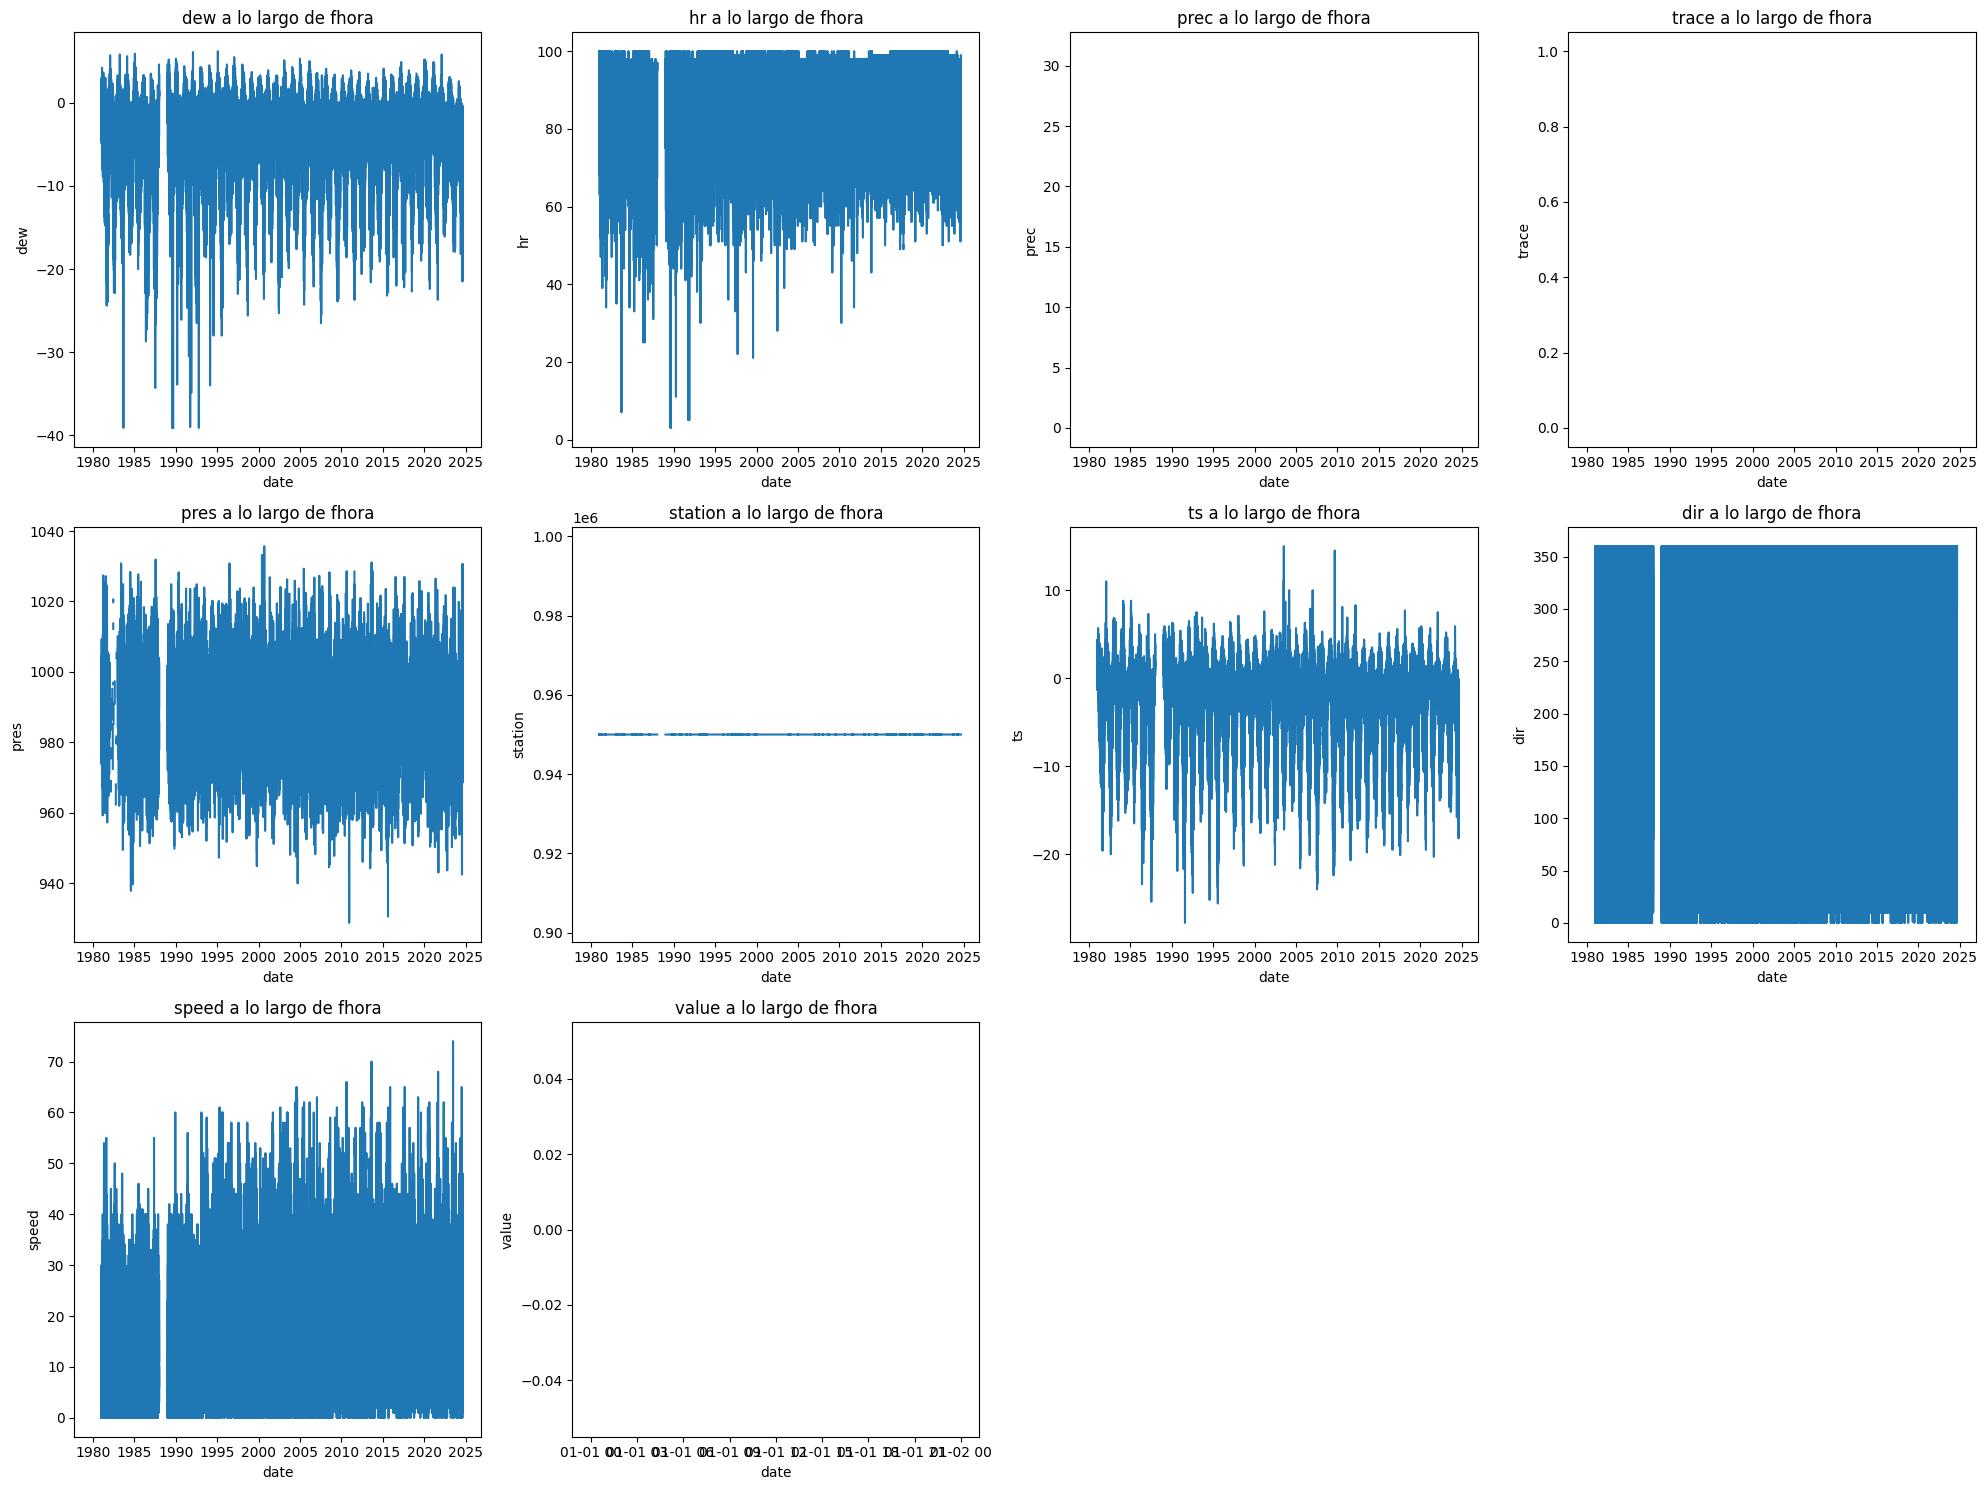

In [24]:
df['date'] = pd.to_datetime(df['date'])

num_cols = len(df.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df.columns.drop('date')):
    print(col)
    ax.plot(df['date'], df[col])
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo de fhora')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

In [56]:
df['date'] = pd.to_datetime(df['date'])

num_cols = len(df.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df.columns.drop('date')):
    print(col)
    ax.plot(df['date'], df[col])
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo de fhora')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>


#! SOLAMENTE PARA VERNADSKY -CONCATENAR DOS DATAFRAMES


df = df[df['date'] < pd.to_datetime('2011-01-01')]

In [73]:
df_vernadksy = pd.read_csv(f'./3h_data/vernadsky.csv')
df_vernadksy['date'] = pd.to_datetime(df_vernadksy['date'])

df_vernadksy.tail()

,date,temp,dir,vel,pres
130102,2010-12-31 19:00:00,2.7,172.0,NaN,989.401
130103,2010-12-31 20:00:00,1.4,200.0,NaN,988.605
130104,2010-12-31 21:00:00,1.6,148.0,NaN,988.504
130105,2010-12-31 22:00:00,1.4,209.0,NaN,988.105
130106,2010-12-31 23:00:00,0.7,260.0,NaN,987.907


In [74]:
# Concatenar los DataFrames
df_combined = pd.concat([df_vernadksy, df], axis=0, join='outer', ignore_index=True)

# Mostrar el resultado
print(df_combined.tail())

                      date  temp    dir  vel   pres    hr  prec
164351 2022-10-12 06:00:00   2.3   10.0  7.0  966.8  64.0   NaN
164352 2022-10-12 09:00:00   0.0  360.0  8.0  968.1  85.0   NaN
164353 2022-10-12 12:00:00  -0.4  170.0  2.0  970.3  86.0   NaN
164354 2022-10-12 15:00:00  -0.2  260.0  2.0  972.1  88.0   NaN
164355 2022-10-12 18:00:00   0.3  220.0  1.0  973.7  90.0   NaN


In [76]:
# Filtrar las filas donde la hora es múltiplo de 3
df_filtered = df_combined[df_combined['date'].dt.hour % 3 == 0]

# Mostrar el resultado
print(df_filtered.tail())

                      date  temp    dir  vel   pres    hr  prec
164351 2022-10-12 06:00:00   2.3   10.0  7.0  966.8  64.0   NaN
164352 2022-10-12 09:00:00   0.0  360.0  8.0  968.1  85.0   NaN
164353 2022-10-12 12:00:00  -0.4  170.0  2.0  970.3  86.0   NaN
164354 2022-10-12 15:00:00  -0.2  260.0  2.0  972.1  88.0   NaN
164355 2022-10-12 18:00:00   0.3  220.0  1.0  973.7  90.0   NaN


In [77]:
df.to_csv(f'./3h_data/{station}.csv', index=False)

In [7]:
df_copy.tail()

,date,temp,skt,dir,vel,hr,prec,pres
938778,2024-03-23 23:10:00+00:00,0.5,-0.3,229,6.4,82,0.0,991.6
938779,2024-03-23 23:20:00+00:00,0.3,-0.4,225,5.4,82,0.0,991.9
938780,2024-03-23 23:30:00+00:00,0.3,-0.4,220,7.2,82,0.0,991.9
938781,2024-03-23 23:40:00+00:00,0.4,-0.4,234,8.1,82,0.0,991.7
938782,2024-03-23 23:50:00+00:00,0.4,-0.4,232,7.6,83,0.0,991.8


In [36]:
df['date'] = pd.to_datetime(df['date'])

df = df[df['date'].dt.minute == 0]
df = df.reset_index(drop=True)
df.head(10)

,date,temp,dir,vel,hr,prec,pres
0,2015-12-01 00:00:00,-1.3,270.0,7.47,83.0,0.000,978.3
1,2015-12-01 01:00:00,-1.4,287.0,7.07,91.0,0.254,978.4
2,2015-12-01 02:00:00,-1.3,299.0,9.17,89.0,0.000,978.1
3,2015-12-01 03:00:00,-1.2,303.0,9.98,89.0,0.000,977.6
4,2015-12-01 04:00:00,-1.2,299.0,9.49,91.0,0.000,977.6
5,2015-12-01 05:00:01,-1.3,302.0,11.46,94.0,0.000,977.1
6,2015-12-01 06:00:01,-1.2,289.0,10.27,93.0,0.000,977.1
7,2015-12-01 07:00:00,-1.6,299.0,7.82,90.0,0.000,977.5
8,2015-12-01 08:00:00,-1.6,275.0,5.71,88.0,0.000,978.0
9,2015-12-01 09:00:00,-1.6,284.0,4.77,88.0,1.270,978.4


### Pasos opcionales

Dependiendo de dataset será necesario:
-Acumular la lluvia por horas.
-Inspeccionar y encontrar anomalías (por ejemplo, en las bases de españa han apuntado nulos como 0)

In [9]:

#! RESAMPLE de los valores de ddd,dddstd, dddx y hr.

df_horapunto['hr'] = df_horapunto['hr'].replace(0, np.nan)
df_horapunto['dir'] = df_horapunto['dir'].replace(0, np.nan)



In [29]:

#! SUMA DE LA LLUVIA

df_resampled_sum = df.copy()
if df_resampled_sum['date'].dtype != 'datetime64[ns]':
    df_resampled_sum['date'] = pd.to_datetime(df_resampled_sum['date'])

df_resampled_sum.set_index('date', inplace=True)
df_resampled_sum = df_resampled_sum.resample('H').sum(min_count=1)
df_resampled_sum.reset_index(inplace=True)

df_resampled_sum.head(10)

df_horapunto['prec'] = df_resampled_sum['prec']

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_6992\2018439832.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled_sum = df_resampled_sum.resample('H').sum(min_count=1)


In [30]:
df_horapunto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168070 entries, 0 to 4168069
Data columns (total 7 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   temp    float64       
 2   dir     float64       
 3   vel     float64       
 4   hr      float64       
 5   prec    float64       
 6   pres    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 222.6 MB


temp
dir
vel
hr
prec
pres


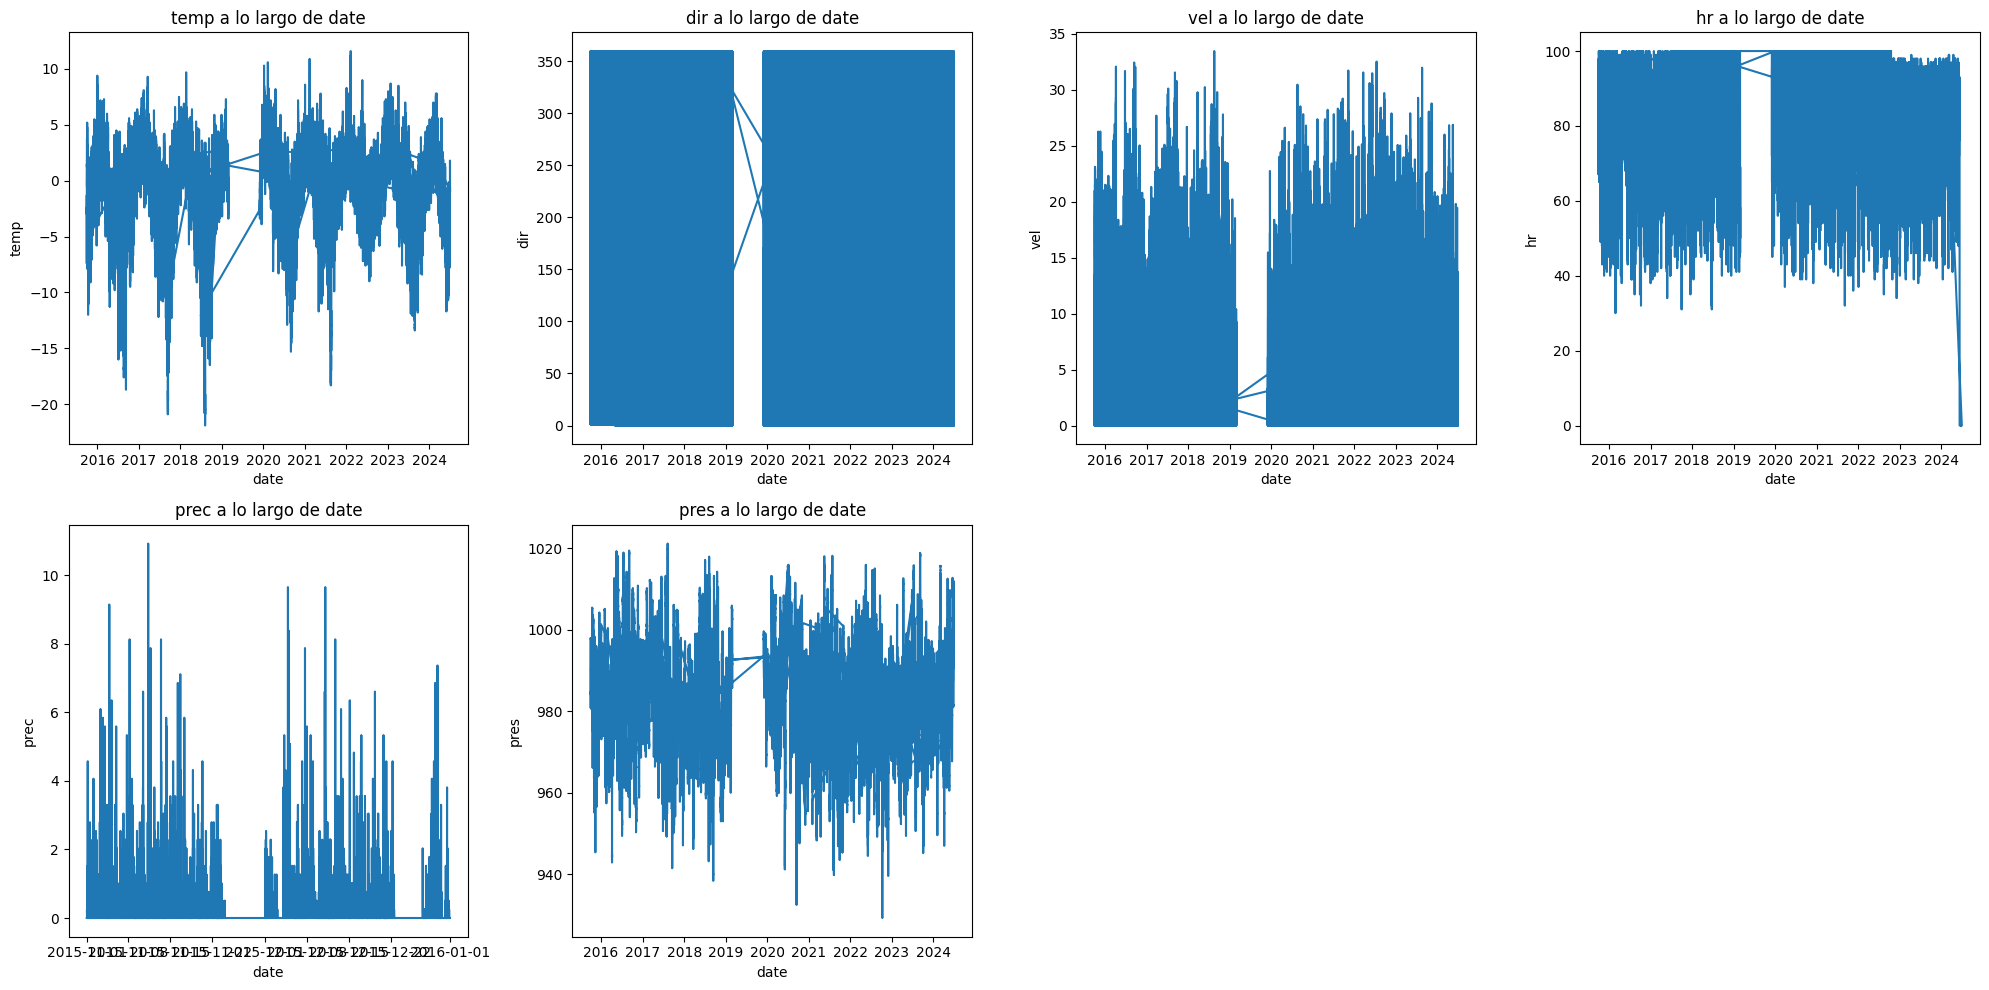

In [31]:



num_cols = len(df_horapunto.columns) - 1  # Restamos 1 para excluir la columna 'fhora'
num_rows = math.ceil(num_cols / 4)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas (excluyendo 'fhora') y generar gráficos
for ax, col in zip(axes, df_horapunto.columns.drop('date')):
    print(col)
    ax.plot(df_horapunto['date'], df_horapunto[col])
    ax.set_xlabel('date')
    ax.set_ylabel(col)
    ax.set_title(f'{col} a lo largo de date')

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 4
if num_cols % 4:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()

plt.savefig('resource/eda_{station}_2.png')
plt.show()

In [38]:

df.to_csv(f'./data/data_{station}/{station}_clean.csv',  index=False)

In [20]:

df_horapunto.head()

,date,temp,dir,vel,hr,prec,pres
0,2015-10-01 00:00:00,-2.4,293.0,8.04,87.0,0.0,980.9
1,2015-10-01 01:00:00,-2.2,309.0,7.07,83.0,0.0,981.9
2,2015-10-01 02:00:00,-3.5,252.0,9.54,90.0,0.0,983.5
3,2015-10-01 03:00:00,-4.1,265.0,6.57,91.0,0.0,985.2
4,2015-10-01 04:00:00,-4.7,282.0,8.32,89.0,0.0,986.5


KeyboardInterrupt: 

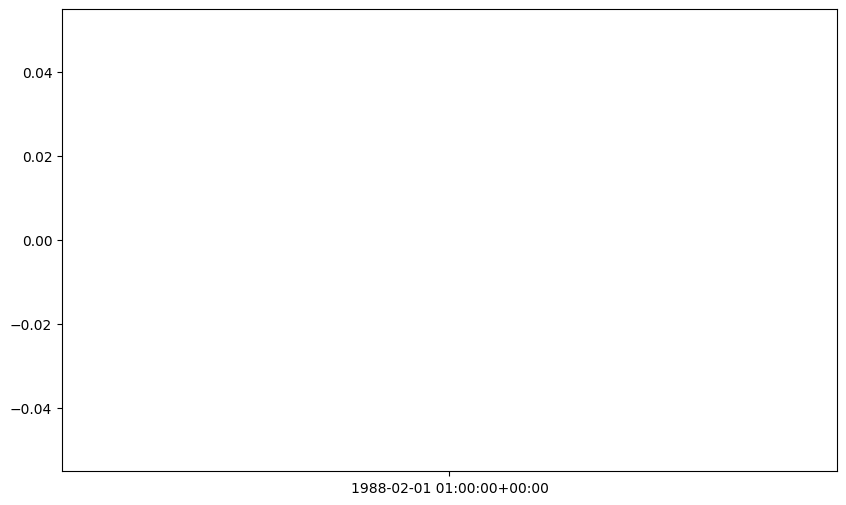

In [33]:

#! Asegúrate de que 'date' es una variable de fecha/hora
df_horapunto['date'] = pd.to_datetime(df_horapunto['date'])

plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura a 10x6 pulgadas
sns.barplot(x='date', y='prec', data=df_horapunto)
plt.xlabel('Fecha')
plt.ylabel('Lluvia')
plt.title('Lluvia por fecha')
plt.show()

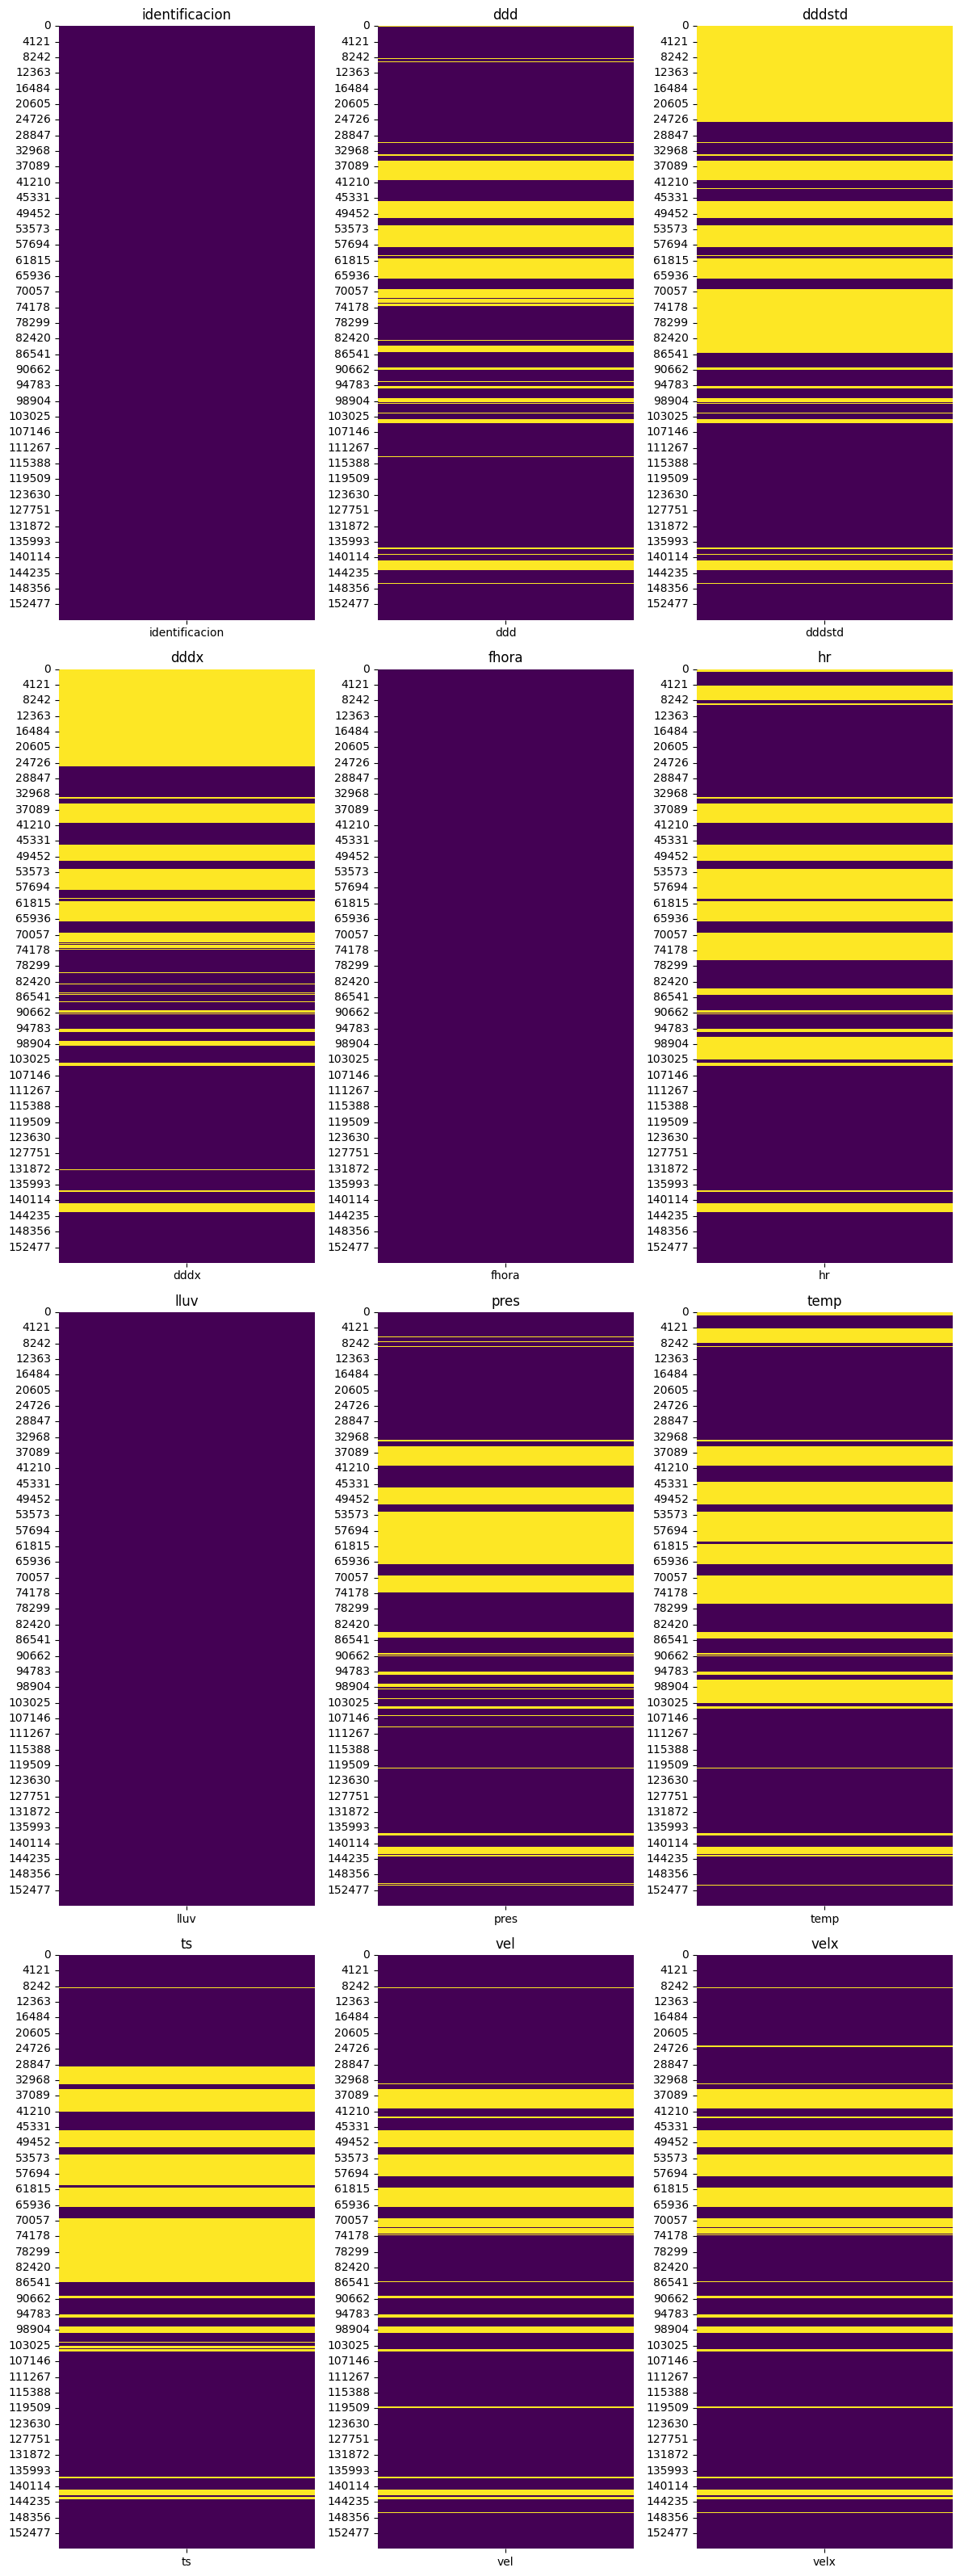

In [19]:
import math

num_cols = len(df_horapunto.columns)
num_rows = math.ceil(num_cols / 3)  # Redondea hacia arriba para obtener el número de filas necesarias

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 8 * num_rows))  # Ajusta el tamaño de la figura según el número de filas

# Aplanar el array de ejes para poder iterar sobre él
axes = axes.flatten()

# Iterar sobre las columnas y generar gráficos
for ax, col in zip(axes, df_horapunto.columns):
    sns.heatmap(df_horapunto[[col]].isnull(), cbar=False, cmap='viridis', ax=ax)
    ax.set_title(col)

# Eliminar los ejes sobrantes si el número de columnas no es múltiplo de 3
if num_cols % 3:
    for ax in axes[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

## Remuestreo para hacer una media diaria

A partir de aquí no es necesario seguir revisando el código. Lo importante está arriba.

In [22]:
df_horapunto_resample = df_horapunto.resample('D').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(df_horapunto_resample[['temp']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing values')
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

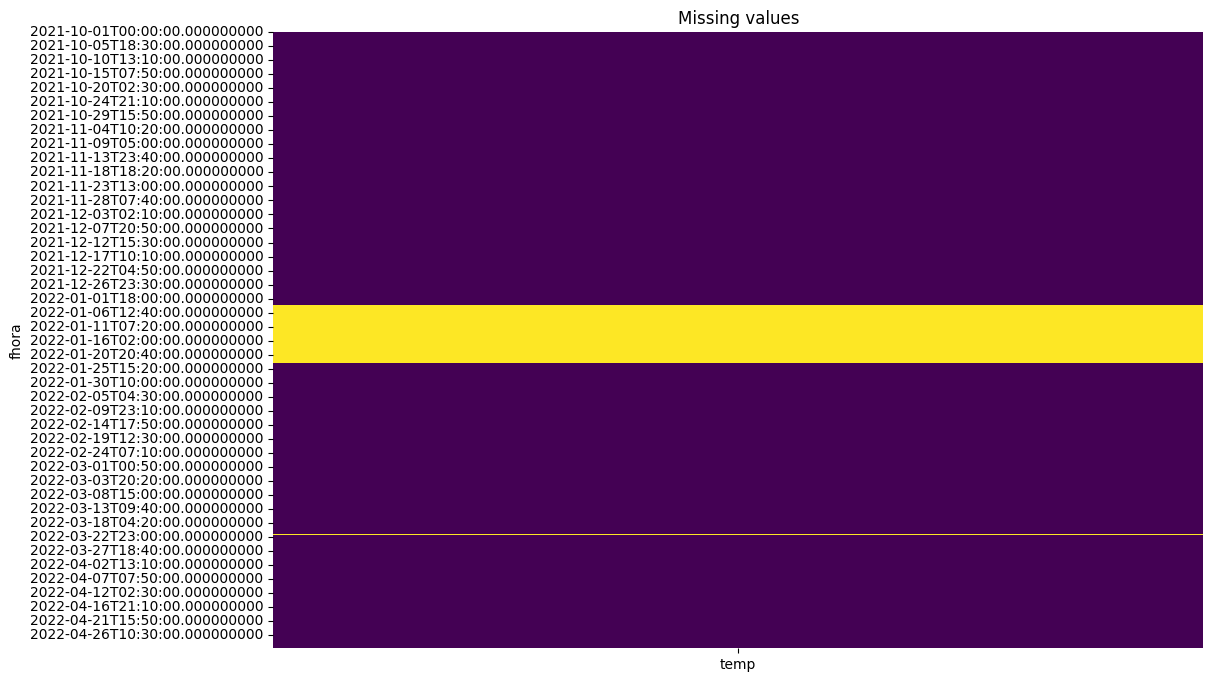

In [ ]:
df_periodo = df_copy[['temp']].loc['2021-10-01':'2022-04-30']

plt.figure(figsize=(12, 8))
sns.heatmap(df_periodo[['temp']].isnull(), cbar=False, cmap='viridis')
plt.title('Missing values')
plt.show()

In [ ]:
df_acumulate = df_horapunto.resample('H').sum()
df_horapunto['lluvAcumulada'] = df_acumulate['lluv']
df_periodo = df_horapunto['2021-02-01':'2024-06-30']

df_periodo[['lluvAcumulada', 'lluv']].head(30)

C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_15104\2453312111.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_acumulate = df_horapunto.resample('H').sum()
C:\Users\Administrador.CRISASUSESTUDIO\AppData\Local\Temp\ipykernel_15104\2453312111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_horapunto['lluvAcumulada'] = df_acumulate['lluv']


,lluvAcumulada,lluv
fhora,,
2021-02-01 00:00:00+00:00,0.1,0.1
2021-02-01 01:00:00+00:00,0.1,0.1
2021-02-01 02:00:00+00:00,0.0,0.0
2021-02-01 03:00:00+00:00,0.0,0.0
2021-02-01 04:00:00+00:00,0.0,0.0
2021-02-01 05:00:00+00:00,0.2,0.2
2021-02-01 06:00:00+00:00,0.0,0.0
2021-02-01 07:00:00+00:00,0.0,0.0
2021-02-01 08:00:00+00:00,0.0,0.0


In [ ]:
correspondence = df_periodo['lluvAcumulada'].eq(df_periodo['lluv'])
correspondence.value_counts()

True     24328
False     2899
Name: count, dtype: int64